# Сравнительный анализ алгоритмов QuickSort и IntroSort

### Краткое описание данных и их считывание

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [23]:
df1 = pd.read_csv("sort_results.csv")
df2 = pd.read_csv("introsort_results.csv")

In [24]:
df1

,size,random,reversed,almost_sorted
0,500,75,74,73
1,600,88,89,85
2,700,108,103,100
3,800,117,118,121
4,900,132,132,129
...,...,...,...,...
141,14600,5578,16463,9439
142,14700,18536,14081,14263
143,14800,15507,15323,5117
144,14900,25580,83384,39134


In [25]:
df2

,size,random,reversed,almost_sorted
0,500,38,34,39
1,600,42,42,41
2,700,49,47,48
3,800,56,54,53
4,900,62,61,65
...,...,...,...,...
141,14600,211565,188131,141715
142,14700,174979,163077,99979
143,14800,150542,173832,109917
144,14900,198428,199231,152257


**df1** - хранит скорость работы обычного QuickSort для разных размеров массивов.

**df2** - хранит скорость работы IntroSort для разных размеров массивов.

Каждый датасет хранит 146 замеров.

In [38]:
df1_first_half = df1.iloc[:95]
df2_first_half = df2.iloc[:95]

df1_second_half = df1.iloc[95:]
df2_second_half = df2.iloc[95:]

### Графики и вывод

Рассмотрим результаты замеров для массивов до 10000


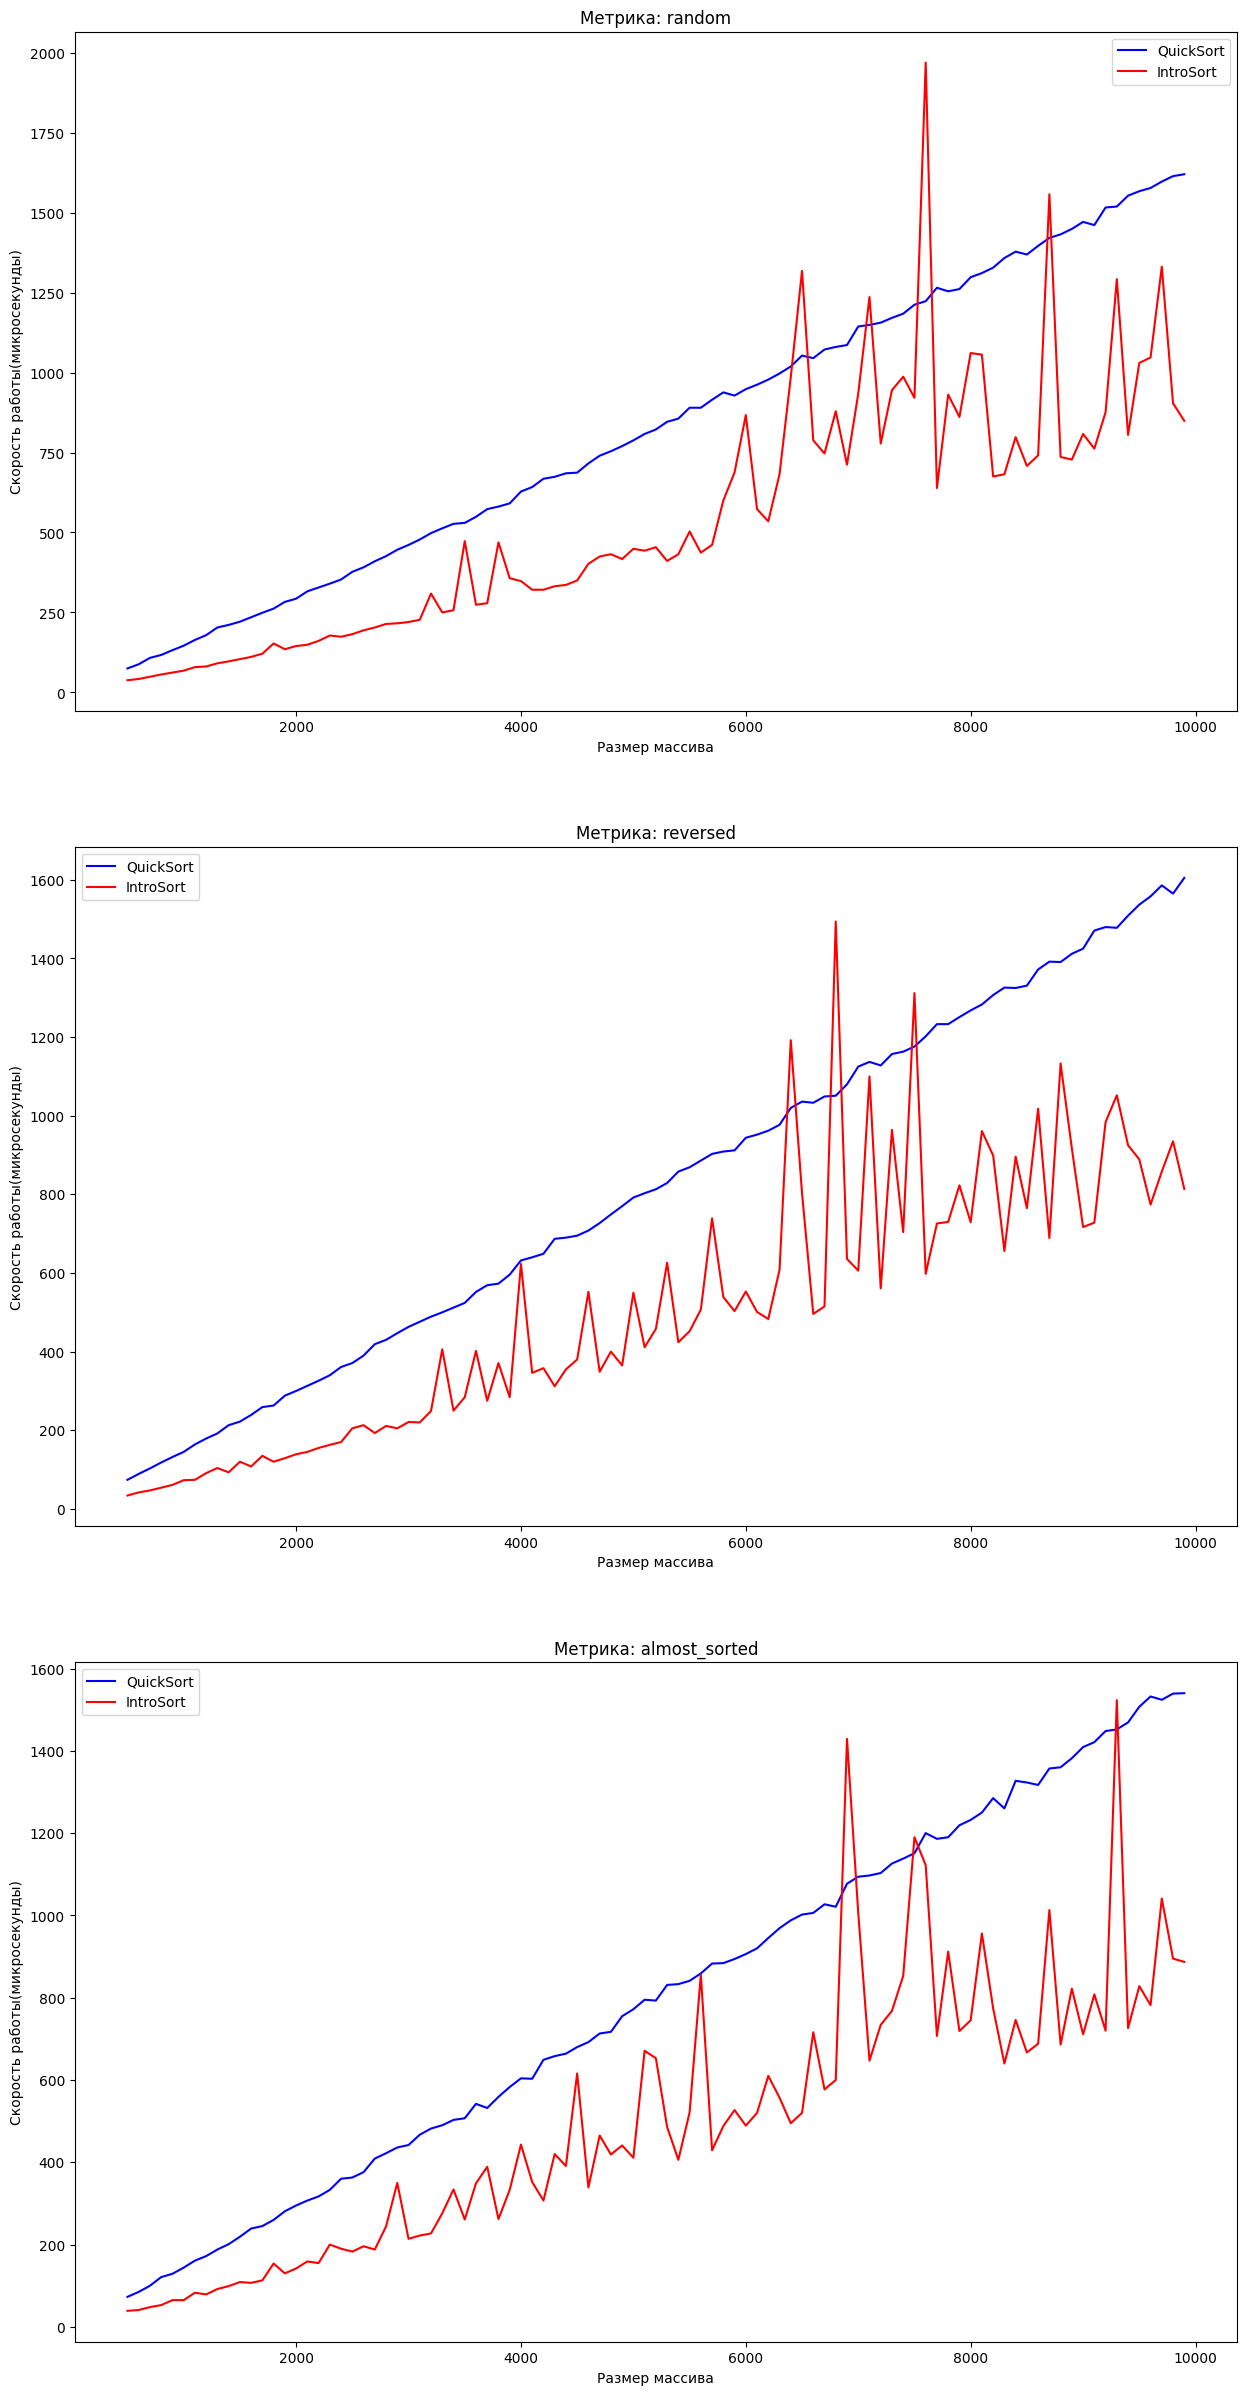

In [39]:
metrics = ['random', 'reversed', 'almost_sorted']
colors = ['blue', 'red']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 30))

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.plot(df1_first_half['size'], df1_first_half[metric], label='QuickSort', color=colors[0])
    ax.plot(df2_first_half['size'], df2_first_half[metric], label='IntroSort', color=colors[1])

    ax.set_title(f"Метрика: {metric}")
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Скорость работы(микросекунды)')
    ax.legend()


Теперь рассмотрим результаты замеров для массивов от 10000 до 15000


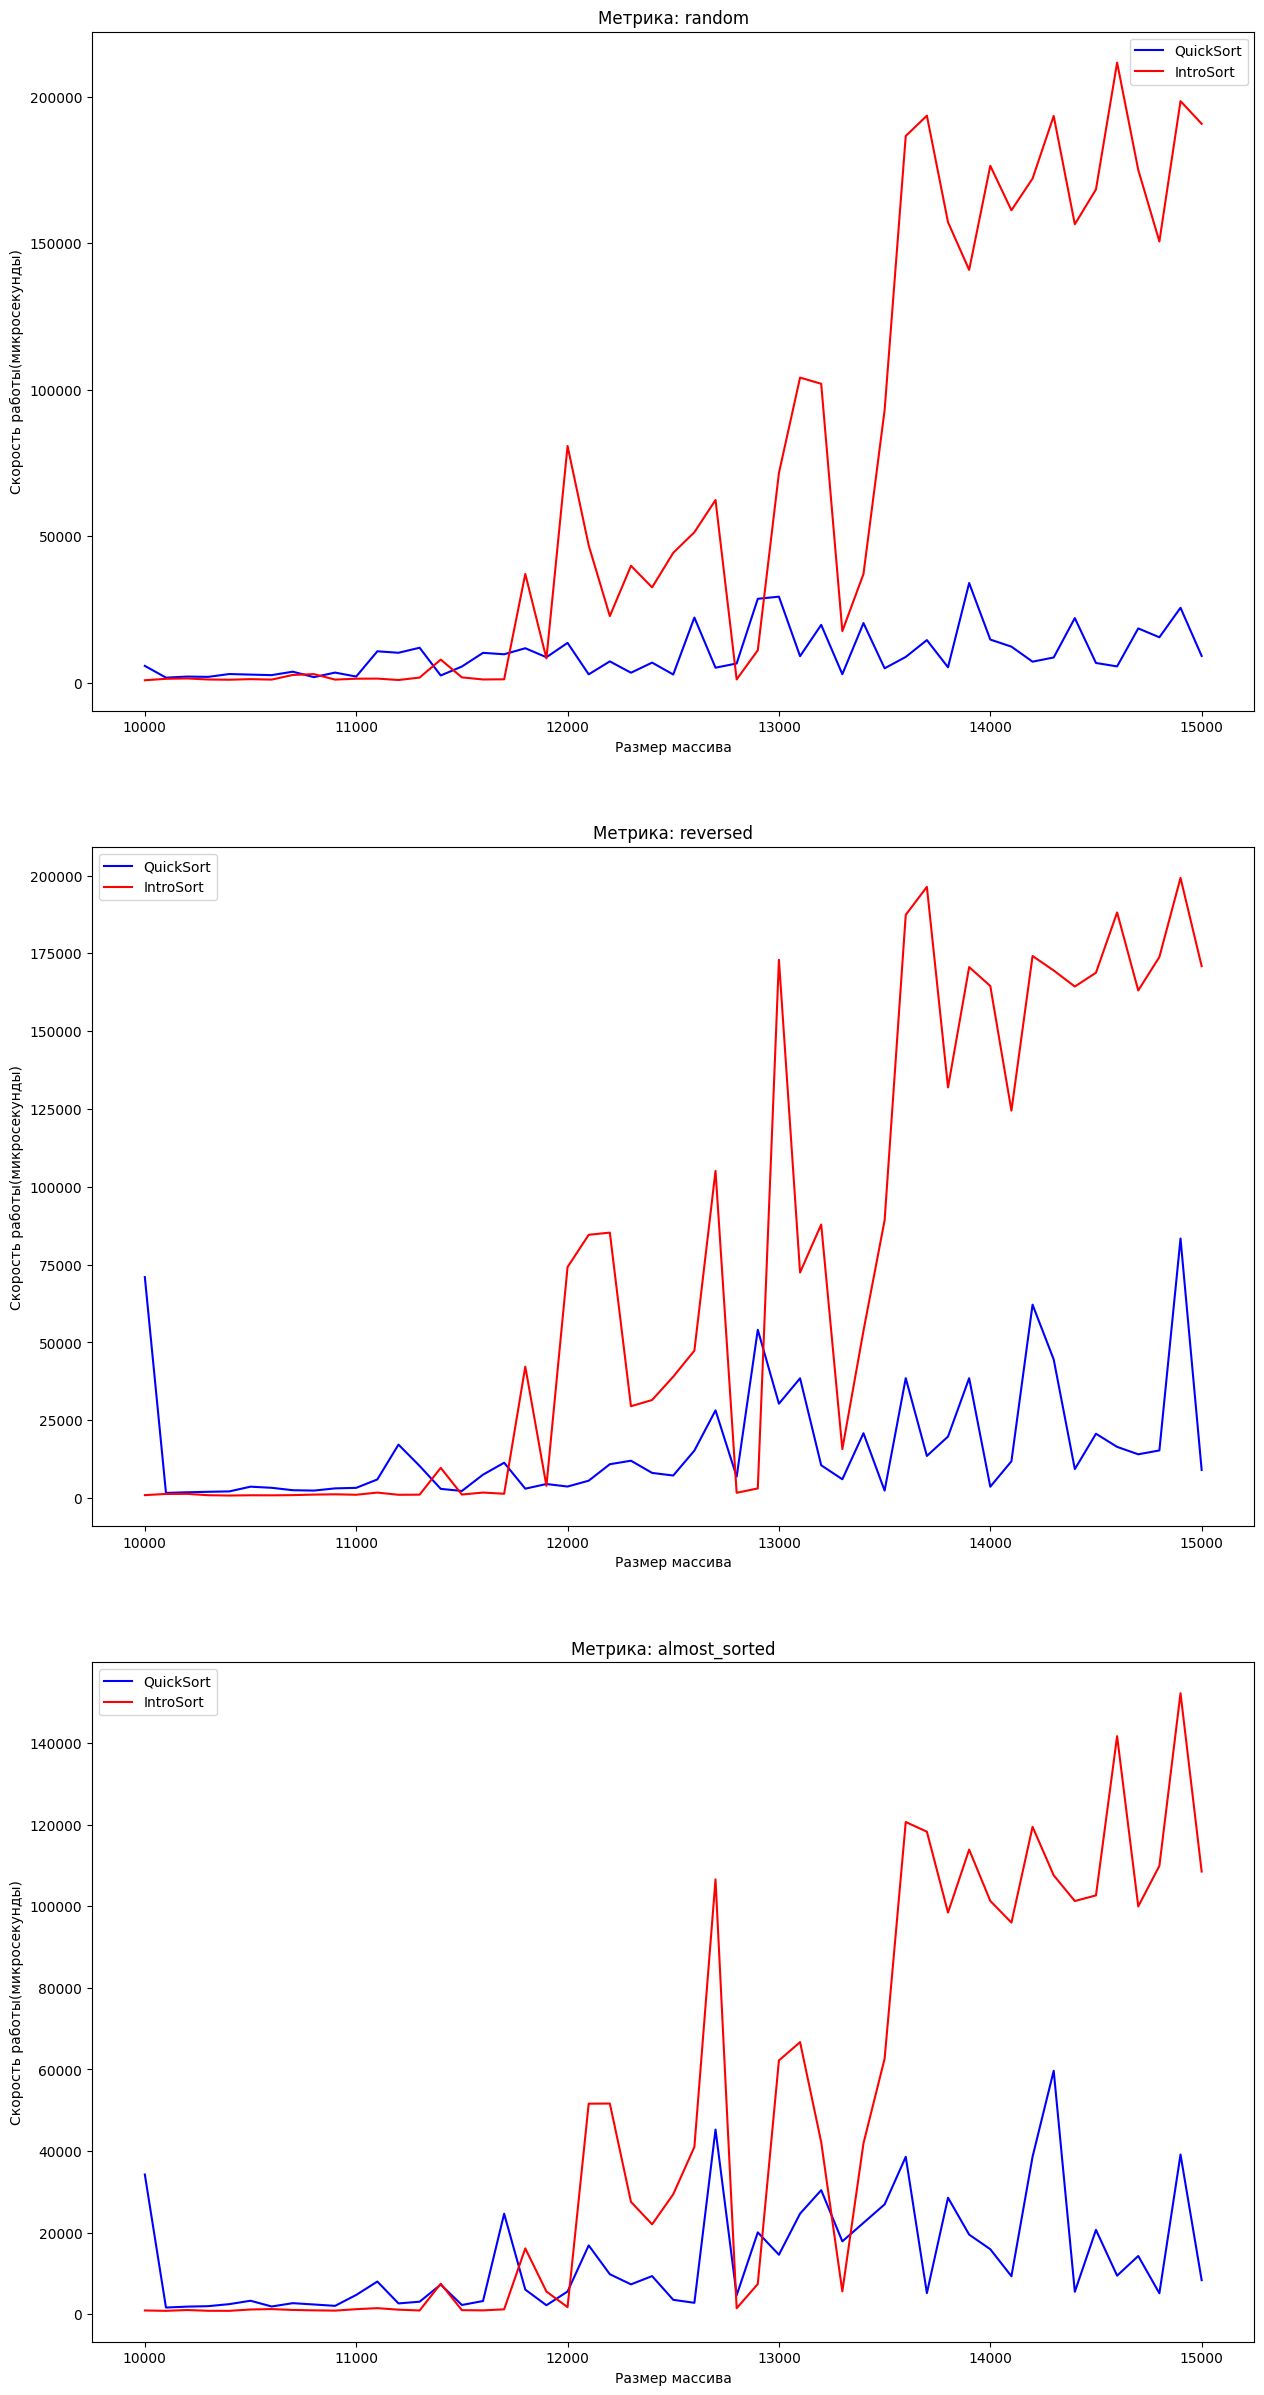

In [40]:
metrics = ['random', 'reversed', 'almost_sorted']
colors = ['blue', 'red']
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 30))

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.plot(df1_second_half['size'], df1_second_half[metric], label='QuickSort', color=colors[0])
    ax.plot(df2_second_half['size'], df2_second_half[metric], label='IntroSort', color=colors[1])

    ax.set_title(f"Метрика: {metric}")
    ax.set_xlabel('Размер массива')
    ax.set_ylabel('Скорость работы(микросекунды)')
    ax.legend()


In [43]:

def calculate_and_print_correlations(df1, df2):
    """Calculates and prints the correlation between each pair of columns in two dataframes."""

    for col1_name in df1.columns:
        for col2_name in df2.columns:
            if col1_name != 'size' and col2_name != 'size':
                if col1_name != col2_name:
                    continue
                correlation = df1[col1_name].corr(df2[col2_name])
                print(f"Корреляция между {col1_name} (df1) и {col2_name} (df2): {correlation}")

calculate_and_print_correlations(df1, df2)

Корреляция между random (df1) и random (df2): 0.6261542399499341
Корреляция между reversed (df1) и reversed (df2): 0.6175567124762049
Корреляция между almost_sorted (df1) и almost_sorted (df2): 0.7095879816666845


Видно, что для массивов до 10000 элементов гидридный алгоритм срабатывает лучше, чем стандартный. Но на отметке ~12000 мы видим явное изменение тренда - рост гибридного алгоритма в разы превосходит рост обычного, который отклоняется от среднего, но не так значительно.

Видно, что на каждом классе массивов есть явные выбросы для гибридного алгоритма, что может означать, что он очень ситуативен. Однако, между ними значимая корреляция, что видно и на графиках

Выводы:
- Использование гибридной реализации выигрывает в случае небольших массивов, для больших лучше использовать классический алгоритм сортировки.
- Использование гибридной сортировки может одновременно хорошо и плохо срабатывать на определенных массивах. Если есть понимание содержания данных, то можно воспользоваться гибридным, чтобы соптимизировать сортировку и не наткнуться на плохой случай.